# Time Series Forecast - Model Building
* Forecast the number of passenger in upcoming months.

In [186]:
# Import required librarires 
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [187]:
import warnings
warnings.filterwarnings('ignore')

In [188]:
airlinedata = pd.read_csv("C:\\Users\\ateen\\Google Drive\\Python\\Time Series Forecasting\\airline-passenger-traffic.csv", header=None)
airlinedata.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [189]:
airlinedata.columns = ['Month', 'Passengers']
airlinedata['Month'] = pd.to_datetime(airlinedata.Month, format='%Y-%m')
airlinedata = airlinedata.set_index('Month')
airlinedata.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


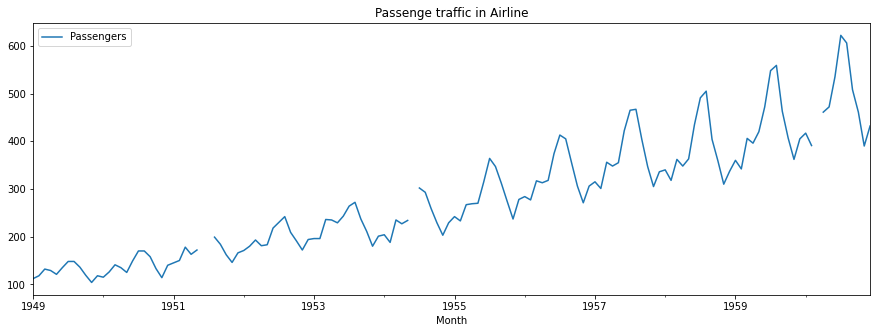

In [190]:
airlinedata.plot(figsize=[15,5])
plt.legend(loc='best')
plt.title('Passenge traffic in Airline')
plt.show(block=False)

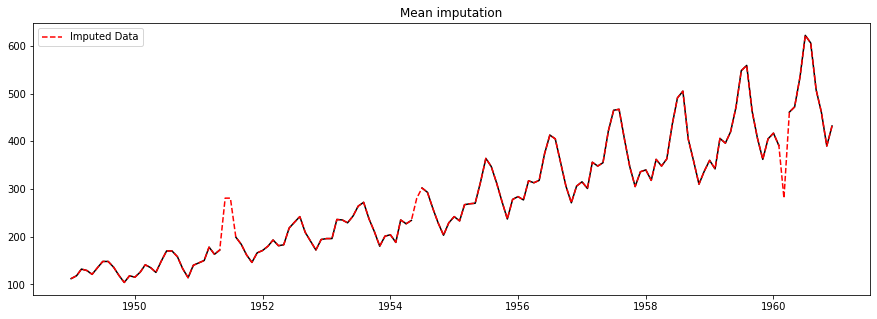

In [191]:
# Mean imputation
plt.figure(figsize=[15,5])
plt.plot(airlinedata.Passengers,'black')
airlinedata = airlinedata.assign(Passenger_NA_mean = airlinedata.Passengers.fillna(airlinedata.Passengers.mean()))
plt.plot(airlinedata.Passenger_NA_mean, '--r', label= 'Imputed Data')
plt.title('Mean imputation')
plt.legend(loc='best')
plt.show()


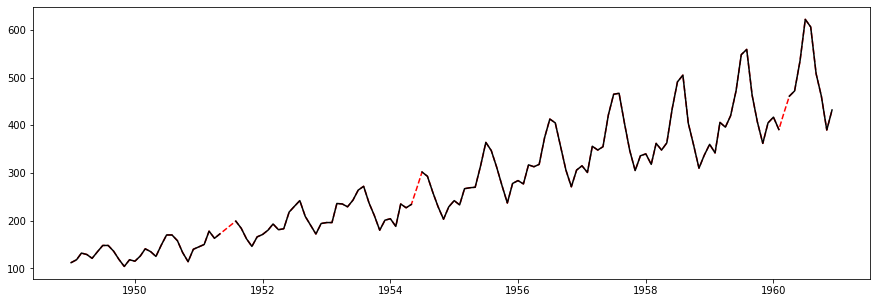

In [192]:
# Interpolation imputation
plt.figure(figsize=[15,5])
airlinedata = airlinedata.assign(Passenger_interpol =  airlinedata.Passengers.fillna(airlinedata.Passengers.interpolate(method='linear')))
plt.plot(airlinedata.Passenger_interpol, '--r', airlinedata.Passengers, 'black')
plt.show()

In [193]:
airlinedata['Passengers'] = airlinedata['Passenger_interpol']
airlinedata.head()

,Passengers,Passenger_NA_mean,Passenger_interpol
Month,,,
1949-01-01,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0


In [194]:
airlinedata['Passengers'] = airlinedata.Passenger_interpol

In [195]:
airlinedata.drop(['Passenger_NA_mean', 'Passenger_interpol'], axis=1, inplace=True)
airlinedata.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:>

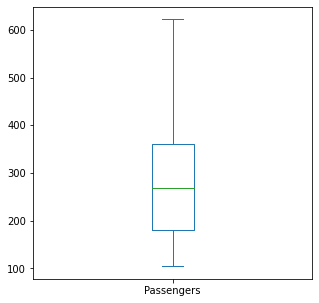

In [196]:
airlinedata.Passengers.plot.box(figsize=[5,5])

<AxesSubplot:>

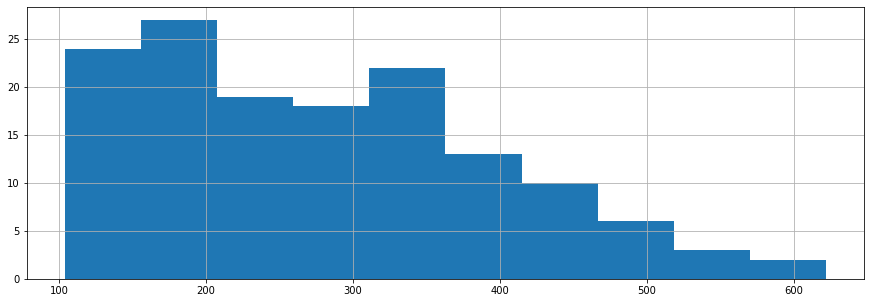

In [197]:
airlinedata.Passengers.hist(figsize=[15,5])


<AxesSubplot:xlabel='Passengers', ylabel='Density'>

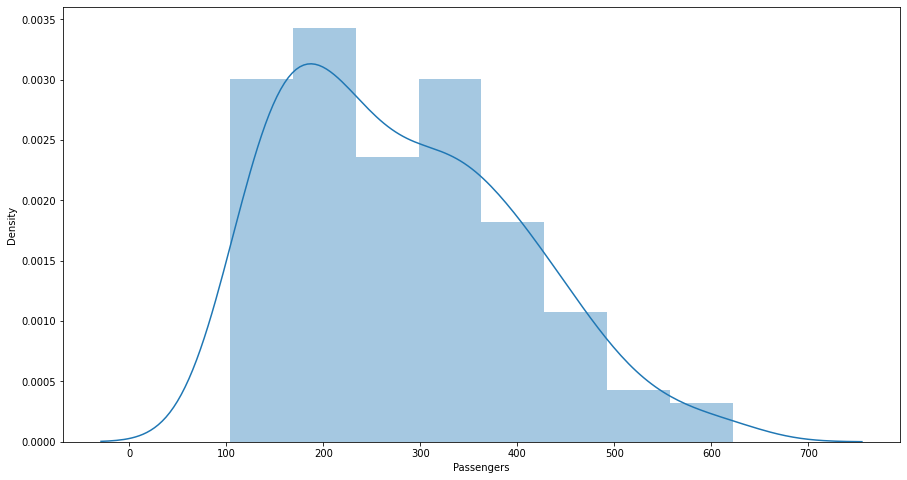

In [198]:
sns.distplot( airlinedata.Passengers )

In [199]:
from pylab import rcParams
import statsmodels.api as sm

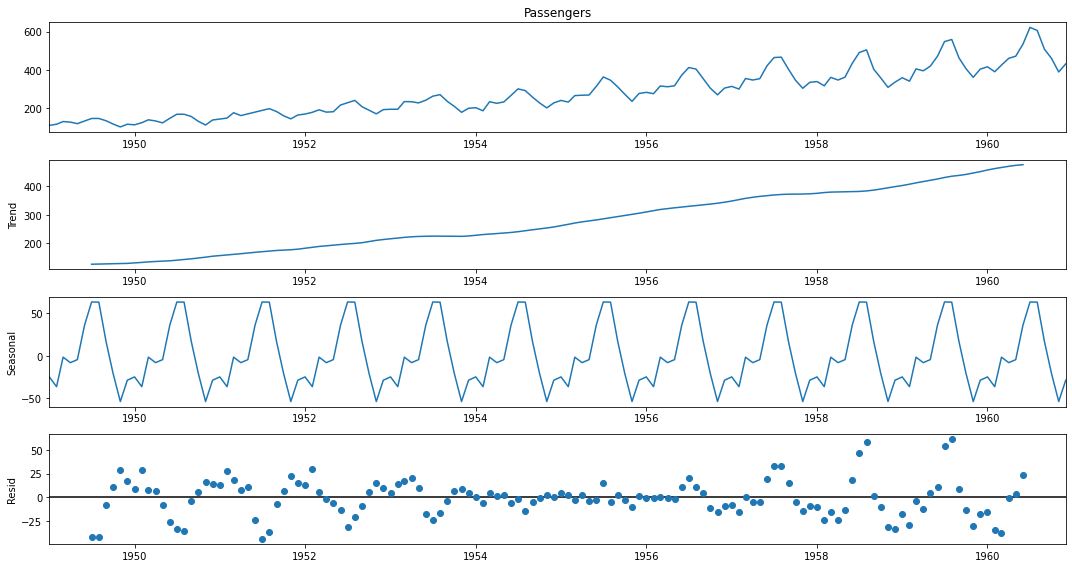

In [200]:
rcParams['figure.figsize'] = 15, 8
decomposition =  sm.tsa.seasonal_decompose(airlinedata.Passengers, model = 'additive')
fig = decomposition.plot()
plt.show()

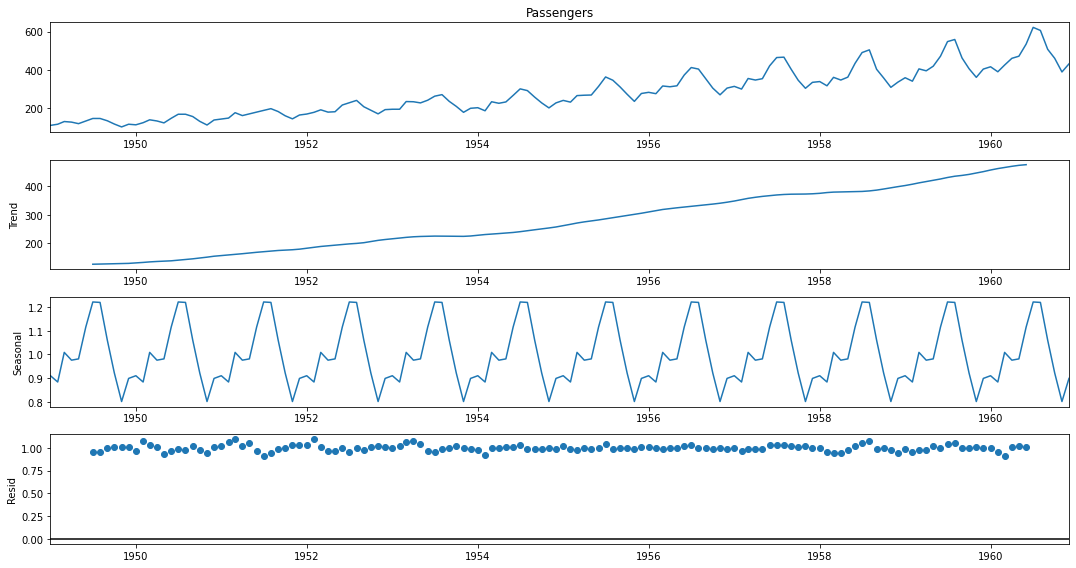

In [201]:
decomposition2 = sm.tsa.seasonal_decompose(airlinedata.Passengers, model='multiplicative')
fig2 = decomposition2.plot()
plt.show()

# Naive Model of Forecasting

In [202]:
# split data in train and test
train_len = 120
train_data = airlinedata[0:train_len]
test_data = airlinedata[train_len:]

In [203]:
y_hat_naive = test_data.copy()
y_hat_naive['Naive Forecast']=  train_data['Passengers'][train_len - 1]

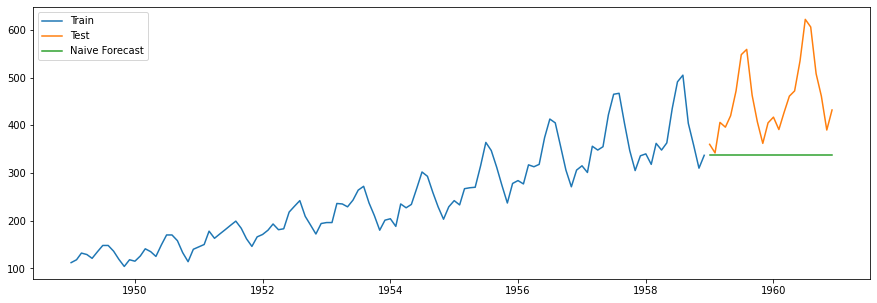

In [204]:
#Plot train test forecast
plt.figure(figsize= [15,5])
plt.plot(train_data.Passengers, label = 'Train')
plt.plot(test_data.Passengers, label = 'Test')
plt.plot(y_hat_naive['Naive Forecast'], label= 'Naive Forecast')
plt.legend(loc='best')
plt.show()

In [205]:
from sklearn.metrics import mean_squared_error
Naive_rmse = np.sqrt(mean_squared_error(test_data.Passengers, y_hat_naive['Naive Forecast'])).round(2)
Naive_rmse

137.51

In [206]:
Naive_mape  = np.round(np.mean((np.abs(test_data.Passengers - y_hat_naive['Naive Forecast'])/test_data['Passengers'])*100), 2)
Naive_mape

23.63

In [207]:
model_data = pd.DataFrame({'Model':['Naive'], 'RMSE':[Naive_rmse], 'MAPE':[Naive_mape]})
model_data = model_data[['Model', 'RMSE', 'MAPE']]
model_data

,Model,RMSE,MAPE
0,Naive,137.51,23.63


# Simple Average Model of Forecasting

In [208]:
y_hat_avg = test_data.copy()
y_hat_avg['Avg Forecast'] = train_data['Passengers'].mean()

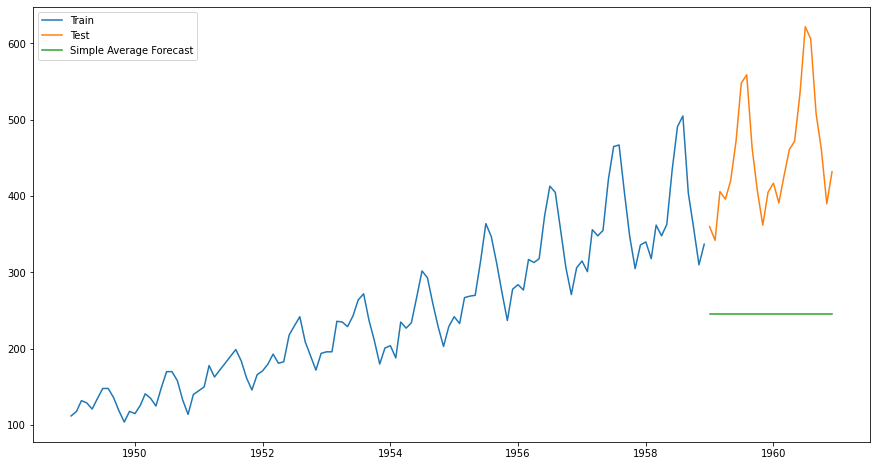

In [209]:
plt.plot(train_data.Passengers, label= 'Train')
plt.plot(test_data.Passengers, label='Test')
plt.plot(y_hat_avg['Avg Forecast'], label= 'Simple Average Forecast')
plt.legend(loc='best')
plt.show()

In [210]:
# Feeding in data table
sa_rmse = np.sqrt(mean_squared_error(test_data['Passengers'], y_hat_avg['Avg Forecast'])).round(2)
sa_mape = np.round((np.mean(np.abs(test_data.Passengers - y_hat_avg['Avg Forecast'])/test_data['Passengers'])*100),2)
model_data = model_data.append({'Model':'Simple Average', 'RMSE':sa_rmse, 'MAPE':sa_mape}, ignore_index=True)
model_data

,Model,RMSE,MAPE
0,Naive,137.51,23.63
1,Simple Average,219.69,44.28


# Simpe Moving Average method

In [211]:
    y_hat_sma = airlinedata.copy()
    ma_window = 12
    y_hat_sma['SMA Forecast'] = airlinedata['Passengers'].rolling(ma_window).mean()
    y_hat_sma['SMA Forecast'][train_len:] = y_hat_sma['SMA Forecast'][train_len-1]

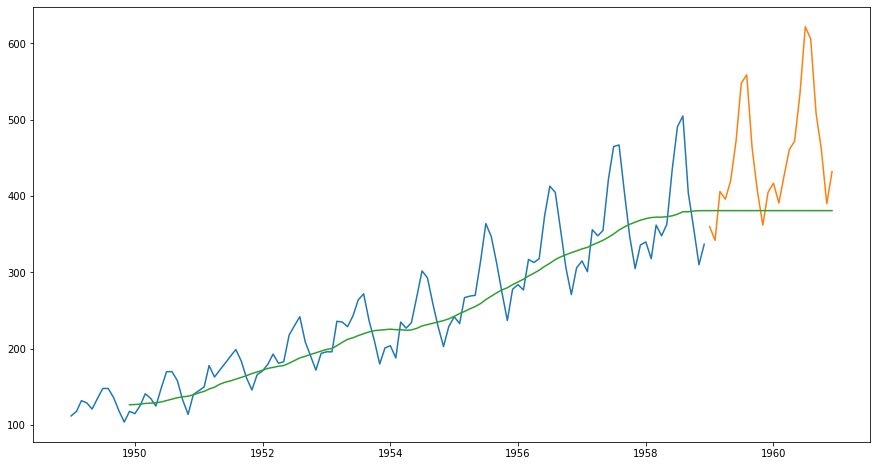

In [212]:
plt.plot(train_data.Passengers, label = 'Train' )
plt.plot(test_data.Passengers, label = 'Test' )
plt.plot(y_hat_sma['SMA Forecast'], label = 'SMA Forecast')

In [213]:
sma_rmse = np.sqrt(mean_squared_error(test_data.Passengers, y_hat_sma['SMA Forecast'][train_len:])).round(2)
sma_mape = np.round(np.mean((np.abs(test_data.Passengers - y_hat_sma['SMA Forecast'][train_len:])/test_data.Passengers)*100),2)
model_data = model_data.append({'Model': 'Simlpe Moving Average', 'RMSE': sma_rmse, 'MAPE':sma_mape}, ignore_index= True)
model_data


,Model,RMSE,MAPE
0,Naive,137.51,23.63
1,Simple Average,219.69,44.28
2,Simlpe Moving Average,103.33,15.54


# Simple Exponantial Smoothing Technique

In [214]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train_data['Passengers'])
model_fit = model.fit(smoothing_level = 0.2, optimized=False)
model_fit.params
y_hat_sest = test_data.copy()
y_hat_sest['sest_forecast'] = model_fit.forecast(24)

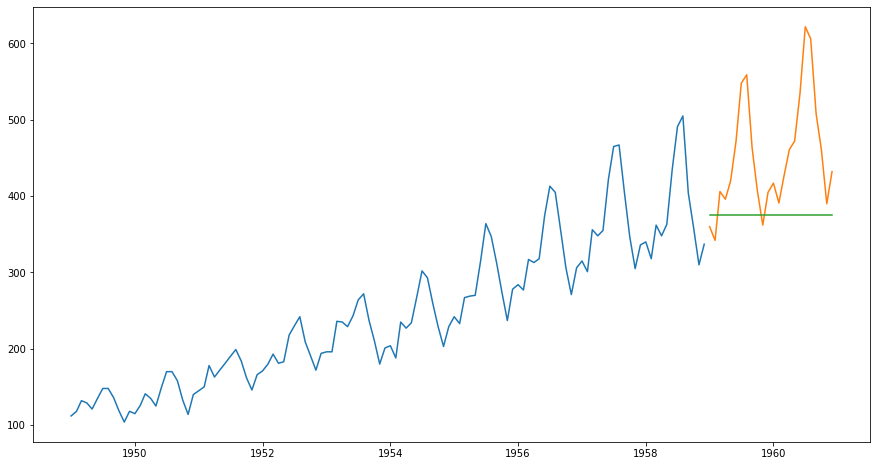

In [215]:
plt.plot(train_data.Passengers, label= 'Train')
plt.plot(test_data.Passengers, label= 'Test')
plt.plot(y_hat_sest.sest_forecast, label= 'SEST')

In [216]:
sest_rmse = np.sqrt(mean_squared_error(test_data.Passengers, y_hat_sest.sest_forecast)).round(2)
sest_mape = np.round(np.mean((np.abs(test_data.Passengers - y_hat_sest.sest_forecast)/test_data.Passengers)*100),2)

model_data = model_data.append({'Model': 'Simple Exponantial Smoothing', 'RMSE':sest_rmse, 'MAPE': sest_mape}, ignore_index= True)
model_data


,Model,RMSE,MAPE
0,Naive,137.51,23.63
1,Simple Average,219.69,44.28
2,Simlpe Moving Average,103.33,15.54
3,Simple Exponantial Smoothing,107.65,16.49


# Holt's Exponantial Smoothing Technique

In [217]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.array(train_data.Passengers), seasonal_periods = 12, trend = 'additive', seasonal=None )
model_fit = model.fit(smoothing_level=0.2, smoothing_slope = 0.01, optimized = False)
y_hat_hes = test_data.copy()
y_hat_hes['HSE_forecast'] = model_fit.forecast(len(test_data))

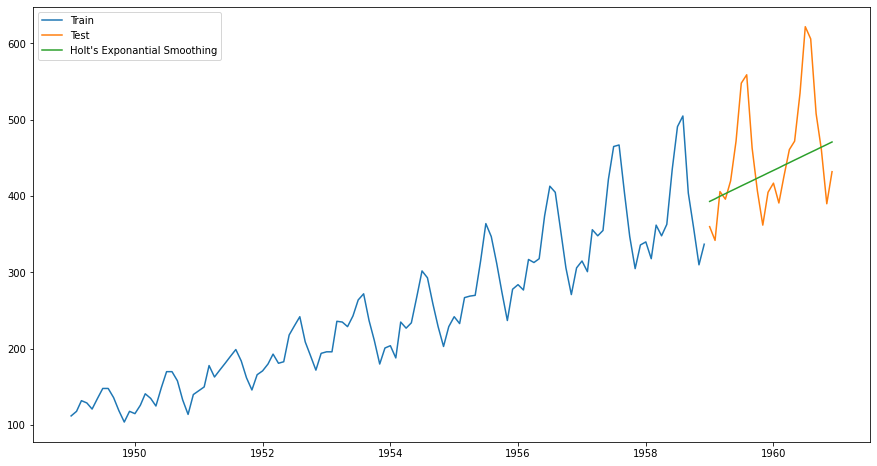

In [218]:
plt.plot(train_data.Passengers, label= 'Train')
plt.plot(test_data.Passengers, label='Test')
plt.plot(y_hat_hes.HSE_forecast, label='Holt\'s Exponantial Smoothing')
plt.legend(loc='best')

In [219]:
hes_rmse= np.sqrt(mean_squared_error(test_data.Passengers, y_hat_hes.HSE_forecast)).round(2)
hes_mape = np.round(np.mean((np.abs(test_data.Passengers - y_hat_hes.HSE_forecast)/test_data.Passengers)*100),2)

model_data =  model_data.append({'Model': 'Holt\s Exponantial Smoothing', 'RMSE':hes_rmse, 'MAPE':hes_mape },ignore_index=True)
model_data

,Model,RMSE,MAPE
0,Naive,137.51,23.63
1,Simple Average,219.69,44.28
2,Simlpe Moving Average,103.33,15.54
3,Simple Exponantial Smoothing,107.65,16.49
4,Holt\s Exponantial Smoothing,71.94,11.11


# Holt-Winter's Exponantial Smoothing Technique

In [220]:
model = ExponentialSmoothing(np.array(train_data.Passengers), trend='add', seasonal ='add', seasonal_periods= 12)
model_fit = model.fit(optimized=True)
y_hat_hwes = test_data.copy()
y_hat_hwes['HWES_forecast'] = model_fit.forecast(24)


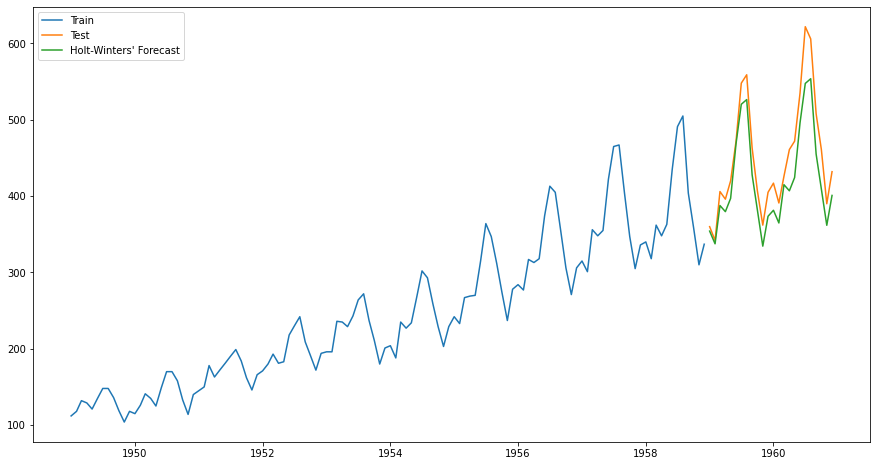

In [221]:
plt.plot(train_data.Passengers, label='Train')
plt.plot(test_data.Passengers, label='Test')
plt.plot(y_hat_hwes.HWES_forecast, label='Holt-Winters\' Forecast')
plt.legend(loc='best')

In [222]:
hwes_rmse = np.sqrt(mean_squared_error(test_data.Passengers, y_hat_hwes.HWES_forecast)).round(2)
hwes_mape = np.round(np.mean((np.abs(test_data.Passengers - y_hat_hwes.HWES_forecast)/test_data.Passengers)*100),2)

model_data = model_data.append({'Model': 'Holt-Winters\' Exponantial Smoothing', 'RMSE': hwes_rmse, 'MAPE': hwes_mape}, ignore_index=True)
model_data

,Model,RMSE,MAPE
0,Naive,137.51,23.63
1,Simple Average,219.69,44.28
2,Simlpe Moving Average,103.33,15.54
3,Simple Exponantial Smoothing,107.65,16.49
4,Holt\s Exponantial Smoothing,71.94,11.11
5,Holt-Winters' Exponantial Smoothing,35.87,6.72


# Statinary Test

## Stationary Vs Non- Stationary

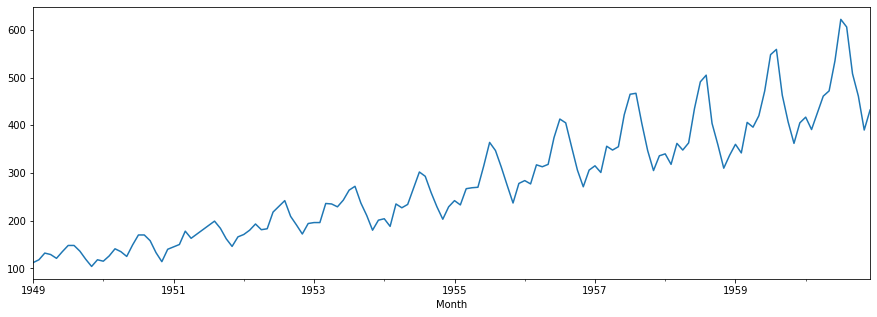

In [223]:
airlinedata.Passengers.plot(figsize = [15,5])
plt.show(block=False)

## Augmented Dicky Fuller Test

* To check eiter data is stationary or not.
* If the p Value is <b>more</b> than 0.05 then we say data is not stationary.
>* Null Hypothesis : The Series is not Stationary 
>* Alternate Hypothesis : The series is Satitonary 

In [224]:
from statsmodels.tsa.stattools import adfuller

In [225]:
adf_test  = adfuller(airlinedata.Passengers)
print('ADF stat : ', adf_test[0])
print('Critical Value : ', adf_test[4])
print('p Value : ', adf_test[1])



ADF stat :  0.894608794082391
Critical Value :  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
p Value :  0.9930195647605925


## Kwaitkowski-Phillips-Schmidt-Shinn (KPSS) test
* Check either timeseries are stationary 
* If p value is <b>less</b> than 0.05 we say data is not stationary
>* Nulll Hypothesis : The data is stationary 
>* Alternate Hypothesis :  The data is not stationary 

In [226]:
from statsmodels.tsa.stattools import kpss

In [227]:
kpss_test = kpss(airlinedata.Passengers)
print('KPSS Statistic : ',kpss_test[0])
print('KPSS Critical Value @ 0.05 : ', kpss_test[3]['5%'])
print('p value :', kpss_test[1])

KPSS Statistic :  1.0520501504573108
KPSS Critical Value @ 0.05 :  0.463
p value : 0.01


### In KPSS test we got p value less than 0.05 and in ADF Test p value is more than 0.05 that  shows that the data is not stationary. 

# Converting Non Stationary data to Stationary Data

## Box Cox Transformation

* Data may have different mean , variance or may have trend.

In [228]:
from scipy.stats import boxcox 

<AxesSubplot:xlabel='Month'>

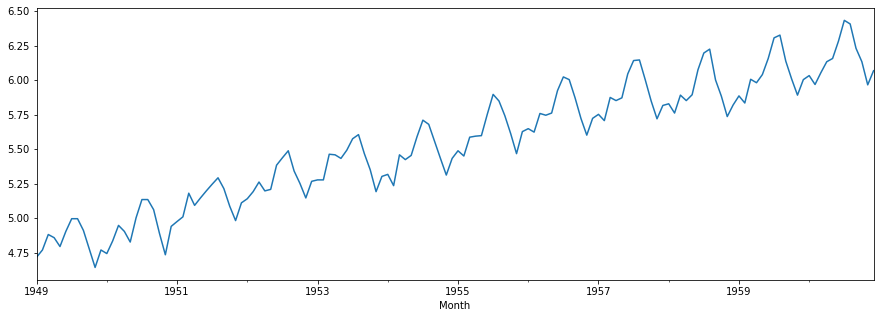

In [229]:
boxcox_data = pd.Series(boxcox(airlinedata.Passengers, lmbda = 0), index= airlinedata.index)

boxcox_data.plot(figsize=[15,5])

<AxesSubplot:xlabel='Month'>

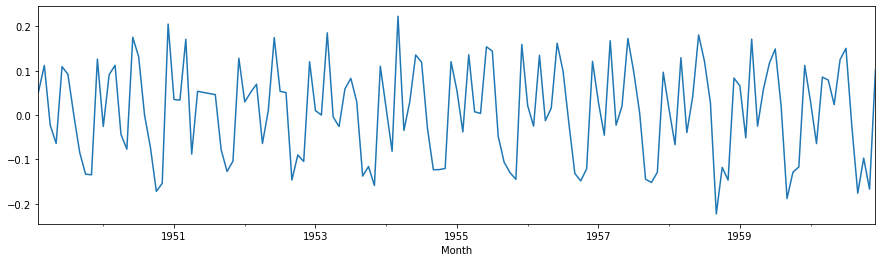

In [230]:
boxcox_data_diff = pd.Series(boxcox_data - boxcox_data.shift(), index = airlinedata.index )
boxcox_data_diff.dropna(inplace=True)

boxcox_data_diff.plot(figsize = [15,4])

In [231]:
# ADF Test
adf_test = adfuller(boxcox_data_diff)

adf_test[1]

0.015326212237944597

In [232]:
# KPSS Test
kpss_test = kpss(boxcox_data_diff)
kpss_test[1]

0.1

# Autocorrelation Function (AF) Plot

In [233]:
from statsmodels.graphics.tsaplots import plot_acf

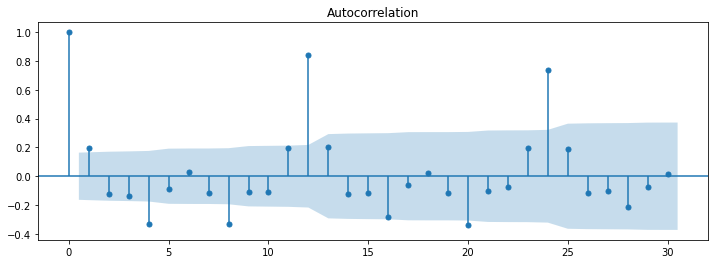

In [234]:
plt.figure(figsize=[12,4])
plot_acf(boxcox_data_diff, ax = plt.gca(), lags=30)
plt.show()

# Partial Autocorrelation Plot 

In [235]:
from statsmodels.graphics.tsaplots import plot_pacf

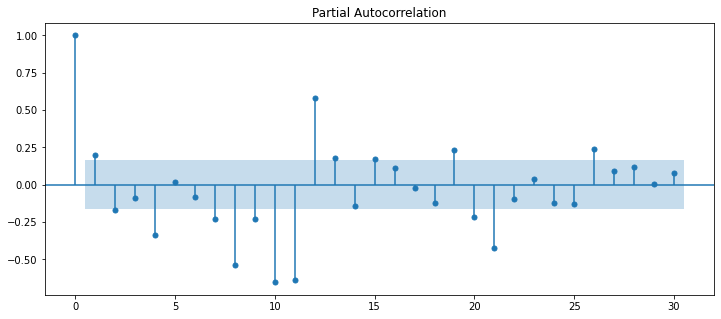

In [236]:
plt.figure(figsize = [12,5])
plot_pacf( boxcox_data_diff, ax= plt.gca(), lags = 30)
plt.show()

## As we have done the box cox transformation on the entire dataset so first we will try to devide the whole data into train and test 

In [237]:
train_boxcox_data = boxcox_data[:train_len]
test_boxcox_data = boxcox_data[train_len:]
train_boxcox_data_diff = boxcox_data_diff[:train_len]
test_boxcox_data_diff = boxcox_data_diff[train_len:]

In [238]:
print(len(train_boxcox_data))
print(len(test_boxcox_data))
print(len(train_boxcox_data_diff))
print(len(test_boxcox_data_diff))

120
24
120
23


In [239]:
from statsmodels.tsa.arima_model import ARIMA

# Auto Regressive Model

In [240]:
model =  ARIMA(train_boxcox_data_diff, order=(1,0,0))
model_fit = model.fit()
print(model_fit.params)

const      0.009917
ar.L1.y    0.185546
dtype: float64


### Recovering the forecast datam

In [241]:
y_hat_ar = boxcox_data_diff.copy()
y_hat_ar['ar_boxcox_data_diff'] = model_fit.predict(boxcox_data_diff.index.min(), boxcox_data_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_boxcox_data_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(boxcox_data[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

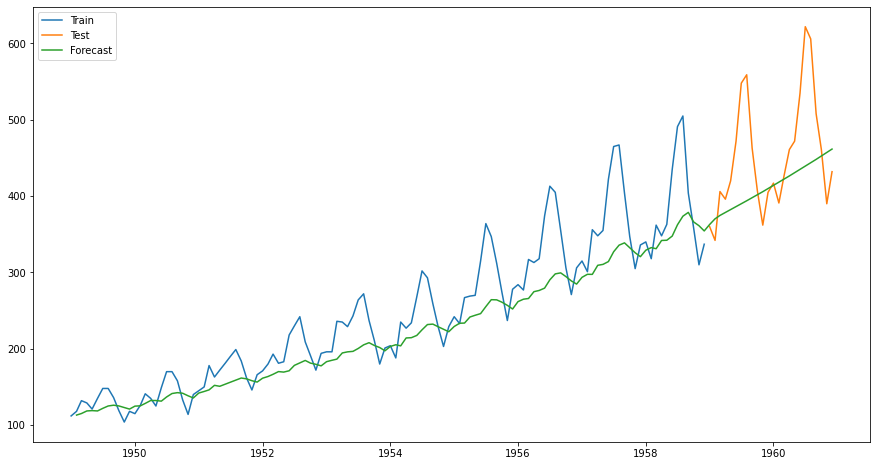

In [242]:
plt.plot(train_data.Passengers, label='Train')
plt.plot(test_data.Passengers, label='Test')
plt.plot(y_hat_ar['ar_forecast'], label='Forecast')
plt.legend(loc='best')

In [243]:
ar_rmse = np.sqrt(mean_squared_error(test_data.Passengers, y_hat_ar.ar_forecast[test_data.index.min():])).round(2)
ar_mape = np.round(np.mean(np.abs(test_data.Passengers - y_hat_ar.ar_forecast[test_data.index.min():])/test_data.Passengers)*100, 2)

In [244]:
model_data = model_data.append({'Model':'Autocorrelation Model', 'RMSE':ar_rmse, 'MAPE':ar_mape }, ignore_index=True)
model_data

,Model,RMSE,MAPE
0,Naive,137.51,23.63
1,Simple Average,219.69,44.28
2,Simlpe Moving Average,103.33,15.54
3,Simple Exponantial Smoothing,107.65,16.49
4,Holt\s Exponantial Smoothing,71.94,11.11
5,Holt-Winters' Exponantial Smoothing,35.87,6.72
6,Autocorrelation Model,79.50,11.36


# Moving Average Method

In [245]:
model = ARIMA(train_boxcox_data_diff, order = [0,0,1])
model_fit = model.fit()
print(model_fit.params)

const      0.009821
ma.L1.y    0.270519
dtype: float64


In [246]:
y_hat_ma = boxcox_data_diff.copy()
y_hat_ma['ma_boxcox_data_diff'] = model_fit.predict(boxcox_data_diff.index.min(), boxcox_data_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_boxcox_data_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(boxcox_data[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

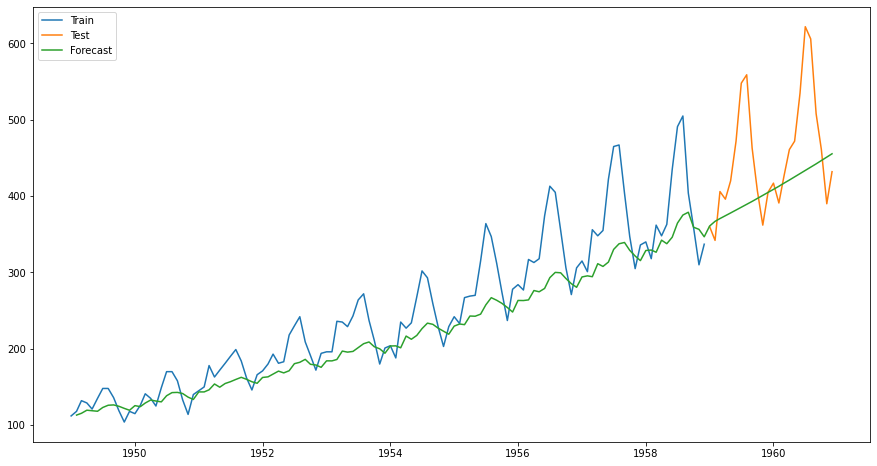

In [247]:
plt.plot(train_data.Passengers, label='Train')
plt.plot(test_data.Passengers, label='Test')
plt.plot(y_hat_ma['ma_forecast'], label='Forecast')
plt.legend(loc='best')

In [248]:
ma_rmse = np.sqrt(mean_squared_error(test_data.Passengers, y_hat_ma.ma_forecast[test_data.index.min():])).round(2)
ma_mape = np.round(np.mean(np.abs(test_data.Passengers - y_hat_ma.ma_forecast[test_data.index.min():])/test_data.Passengers)*100, 2)

In [249]:
model_data = model_data.append({'Model':'Moving Average Model', 'RMSE':ma_rmse, 'MAPE':ma_mape }, ignore_index=True)
model_data

,Model,RMSE,MAPE
0,Naive,137.51,23.63
1,Simple Average,219.69,44.28
2,Simlpe Moving Average,103.33,15.54
3,Simple Exponantial Smoothing,107.65,16.49
4,Holt\s Exponantial Smoothing,71.94,11.11
5,Holt-Winters' Exponantial Smoothing,35.87,6.72
6,Autocorrelation Model,79.50,11.36
7,Moving Average Model,82.18,11.77


# ARMA -  Auto regressive and Moving Average Method

In [250]:
model =  ARIMA(train_boxcox_data_diff, order = (1,0,1))
model_fit = model.fit()
model_fit.params

const      0.009583
ar.L1.y   -0.527564
ma.L1.y    0.798208
dtype: float64

In [251]:
y_hat_arma = boxcox_data_diff.copy()
y_hat_arma['arma_boxcox_data_diff'] = model_fit.predict(boxcox_data_diff.index.min() , boxcox_data_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_boxcox_data_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(boxcox_data[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

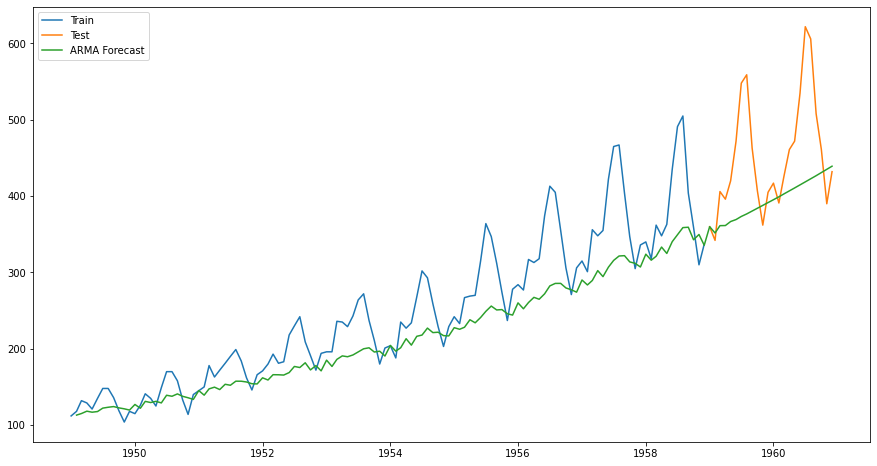

In [252]:
plt.plot(train_data.Passengers, label='Train')
plt.plot(test_data.Passengers, label = 'Test')
plt.plot(y_hat_arma['arma_forecast'], label= 'ARMA Forecast')
plt.legend(loc='best')
plt.show()

In [253]:
arma_rmse = np.sqrt(mean_squared_error(test_data.Passengers, y_hat_arma.arma_forecast[train_len -1 :])).round(2)
arma_mape = np.round(np.mean((np.abs(test_data.Passengers - y_hat_arma.arma_forecast[train_len -1 :])/test_data.Passengers) *100),2)

model_data = model_data.append({'Model': 'ARMA Model', 'RMSE':arma_rmse , 'MAPE':arma_mape}, ignore_index=True)
model_data

,Model,RMSE,MAPE
0,Naive,137.51,23.63
1,Simple Average,219.69,44.28
2,Simlpe Moving Average,103.33,15.54
3,Simple Exponantial Smoothing,107.65,16.49
4,Holt\s Exponantial Smoothing,71.94,11.11
5,Holt-Winters' Exponantial Smoothing,35.87,6.72
6,Autocorrelation Model,79.50,11.36
7,Moving Average Model,82.18,11.77
8,ARMA Model,90.23,13.09


# Auto Regressive Integrated Moving Average Model

In [254]:
model = ARIMA(train_boxcox_data, order=(1,1,1))
model_fit = model.fit()
model_fit.params

const        0.009624
ar.L1.D.y   -0.527115
ma.L1.D.y    0.798281
dtype: float64

In [255]:
# Recover original time series
y_hat_arima = boxcox_data_diff.copy()
y_hat_arima['arima_boxcox_data_diff'] = model_fit.predict(boxcox_data_diff.index.min(), boxcox_data_diff.index.max())
y_hat_arima['arima_forecast_diff'] = y_hat_arima['arima_boxcox_data_diff'].cumsum()
y_hat_arima['arima_forecast_diff'] = y_hat_arima['arima_forecast_diff'].add(boxcox_data[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_diff'])

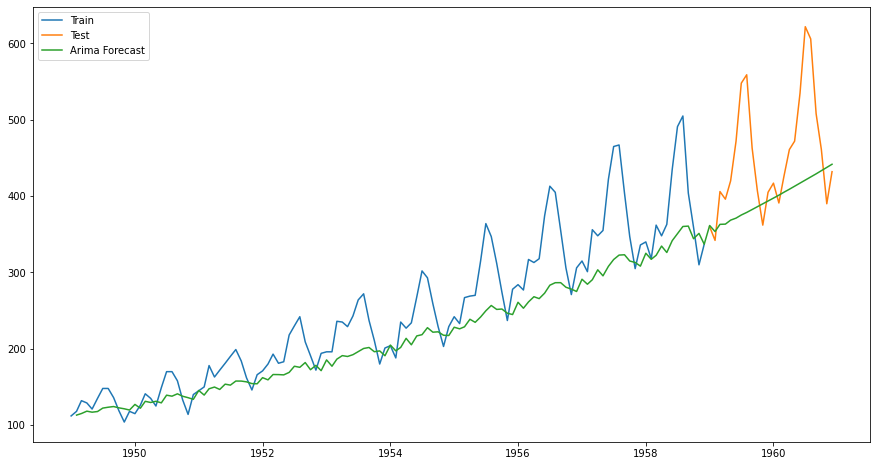

In [256]:
plt.plot(train_data.Passengers , label='Train')
plt.plot(test_data.Passengers, label= 'Test')
plt.plot(y_hat_arima['arima_forecast'], label='Arima Forecast')
plt.legend(loc='best')
plt.show()

In [257]:
arima_rmse = np.sqrt(mean_squared_error(test_data.Passengers, y_hat_arima.arima_forecast[train_len-1:])).round(2)
arima_mape = np.round(np.mean((np.abs(test_data.Passengers - y_hat_arima.arima_forecast[train_len - 1:])/test_data.Passengers)*100),2)

model_data = model_data.append({'Model':'ARIMA Model', 'RMSE':arima_rmse, 'MAPE':arima_mape},  ignore_index=True)
model_data

,Model,RMSE,MAPE
0,Naive,137.51,23.63
1,Simple Average,219.69,44.28
2,Simlpe Moving Average,103.33,15.54
3,Simple Exponantial Smoothing,107.65,16.49
4,Holt\s Exponantial Smoothing,71.94,11.11
5,Holt-Winters' Exponantial Smoothing,35.87,6.72
6,Autocorrelation Model,79.50,11.36
7,Moving Average Model,82.18,11.77
8,ARMA Model,90.23,13.09
9,ARIMA Model,88.88,12.89


# Seasonal Auto Regressive integrated Moving Average Model

In [258]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [259]:
model = SARIMAX(train_boxcox_data, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
model_fit.params

ar.L1       0.382707
ma.L1      -0.675065
ar.S.L12   -0.043606
ma.S.L12   -0.513887
sigma2      0.001408
dtype: float64

In [260]:
y_hat_sarima = boxcox_data_diff.copy()
y_hat_sarima['sarima_boxcox_forecast'] = model_fit.predict(boxcox_data_diff.index.min(), boxcox_data_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_boxcox_forecast'])

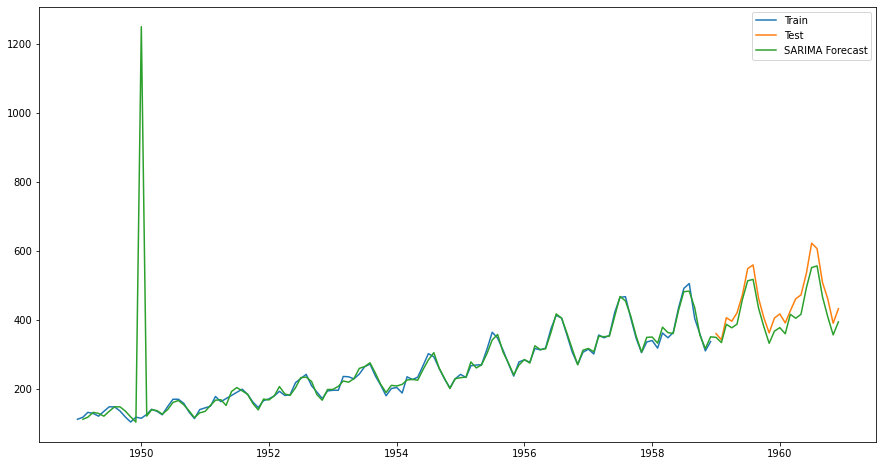

In [261]:
plt.plot(train_data.Passengers, label = 'Train')
plt.plot(test_data.Passengers, label = 'Test')
plt.plot(y_hat_sarima['sarima_forecast'], label = 'SARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [262]:
sarima_rmse = np.sqrt(mean_squared_error(test_data.Passengers , y_hat_sarima.sarima_forecast[train_len - 1:])).round(2)
sarima_mape = np.round(np.mean((np.abs(test_data.Passengers - y_hat_sarima.sarima_forecast[train_len - 1 :])/test_data.Passengers)*100),2)

model_data = model_data.append({'Model':'SARIMA Model', 'RMSE': sarima_rmse , 'MAPE':sarima_mape }, ignore_index=True)
model_data

,Model,RMSE,MAPE
0,Naive,137.51,23.63
1,Simple Average,219.69,44.28
2,Simlpe Moving Average,103.33,15.54
3,Simple Exponantial Smoothing,107.65,16.49
4,Holt\s Exponantial Smoothing,71.94,11.11
5,Holt-Winters' Exponantial Smoothing,35.87,6.72
6,Autocorrelation Model,79.50,11.36
7,Moving Average Model,82.18,11.77
8,ARMA Model,90.23,13.09
9,ARIMA Model,88.88,12.89


# Seasonal Auto Regressive Integrated Moving Average with Exogeneous Factors ( SARIMAX )

# Promotional Data intervention

In [263]:
promotional_data = pd.read_csv('C:\\Users\\ateen\\Google Drive\\Python\\Time Series Forecasting\\promotion.csv', header=None)
promotional_data.head()

,0,1
0,1949-01,0
1,1949-02,0
2,1949-03,0
3,1949-04,0
4,1949-05,0


In [264]:
promotional_data.columns = ['Month', 'Event']
promotional_data['Month'] = pd.to_datetime(promotional_data.Month, format='%Y-%m')
promotional_data = promotional_data.set_index('Month')
promotional_data.head()

,Event
Month,
1949-01-01,0
1949-02-01,0
1949-03-01,0
1949-04-01,0
1949-05-01,0


In [265]:
train_promo = promotional_data[:train_len]
test_promo = promotional_data[train_len :]

In [266]:
model = SARIMAX( train_boxcox_data, order=(1,1,1), seasonal_order=(1,1,1,12), exog= train_promo )
model_fit = model.fit()
model_fit.params

Event       0.034415
ar.L1       0.482667
ma.L1      -0.744719
ar.S.L12   -0.062038
ma.S.L12   -0.560445
sigma2      0.001334
dtype: float64

In [267]:
y_hat_sarimax = boxcox_data_diff.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict( test_data.index.min() , test_data.index.max(), exog = test_promo)
y_hat_sarimax['sarimax_forecast']  = np.exp( y_hat_sarimax['sarimax_forecast_boxcox'] )

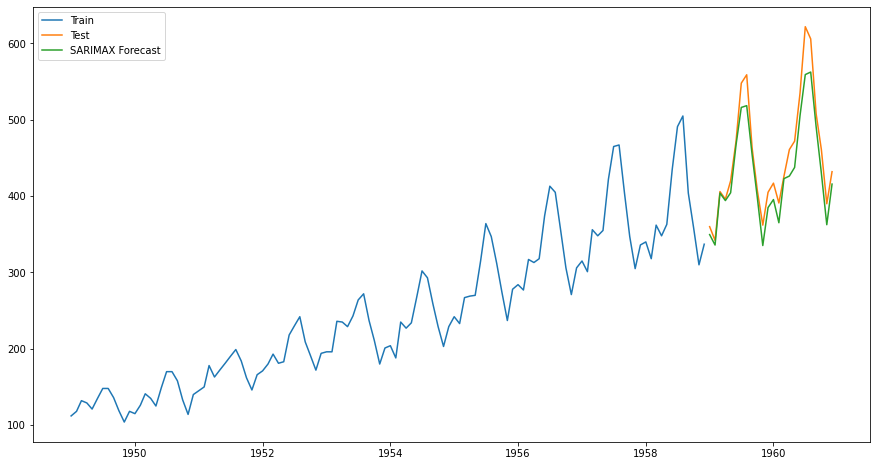

In [268]:
plt.plot(train_data.Passengers, label='Train')
plt.plot(test_data.Passengers, label = 'Test')
plt.plot(y_hat_sarimax.sarimax_forecast, label= 'SARIMAX Forecast')
plt.legend(loc='best')
plt.show()

In [269]:
sarimax_rmse = np.sqrt(mean_squared_error(test_data.Passengers, y_hat_sarimax.sarimax_forecast[test_data.index.min():])).round(2)
sarimax_mape = np.round(np.mean((np.abs(test_data.Passengers - y_hat_sarimax.sarimax_forecast[test_data.index.min():])/test_data.Passengers)*100),2)

model_data = model_data.append({'Model':'SARIMAX Model', 'RMSE':sarimax_rmse , 'MAPE':sarimax_mape}, ignore_index=True)
model_data

,Model,RMSE,MAPE
0,Naive,137.51,23.63
1,Simple Average,219.69,44.28
2,Simlpe Moving Average,103.33,15.54
3,Simple Exponantial Smoothing,107.65,16.49
4,Holt\s Exponantial Smoothing,71.94,11.11
5,Holt-Winters' Exponantial Smoothing,35.87,6.72
6,Autocorrelation Model,79.50,11.36
7,Moving Average Model,82.18,11.77
8,ARMA Model,90.23,13.09
9,ARIMA Model,88.88,12.89
